In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write, read
from scipy import signal

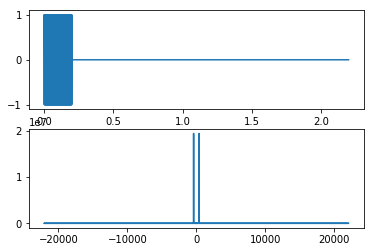

In [2]:
# sampling frequency
fs = 44100
# signal frequency
f = 400
# duration of signal
duration = 0.2
# samples
n = np.arange(fs*duration)
# signal
x = np.cos(2*np.pi*n*f/fs).astype(np.float32)


freq = np.fft.fftfreq(len(x),1/fs)
magnitude = np.fft.fft(x)


delaytime = 2
delay = np.zeros(int(fs*delaytime))

x = np.append(x,delay)
t = np.linspace(0,duration+delaytime,len(x))


plt.subplot(211)
plt.plot(t,x)
plt.subplot(212)
plt.plot(freq, np.abs(magnitude)**2)
plt.show()

write('soundtest.wav',fs, x)

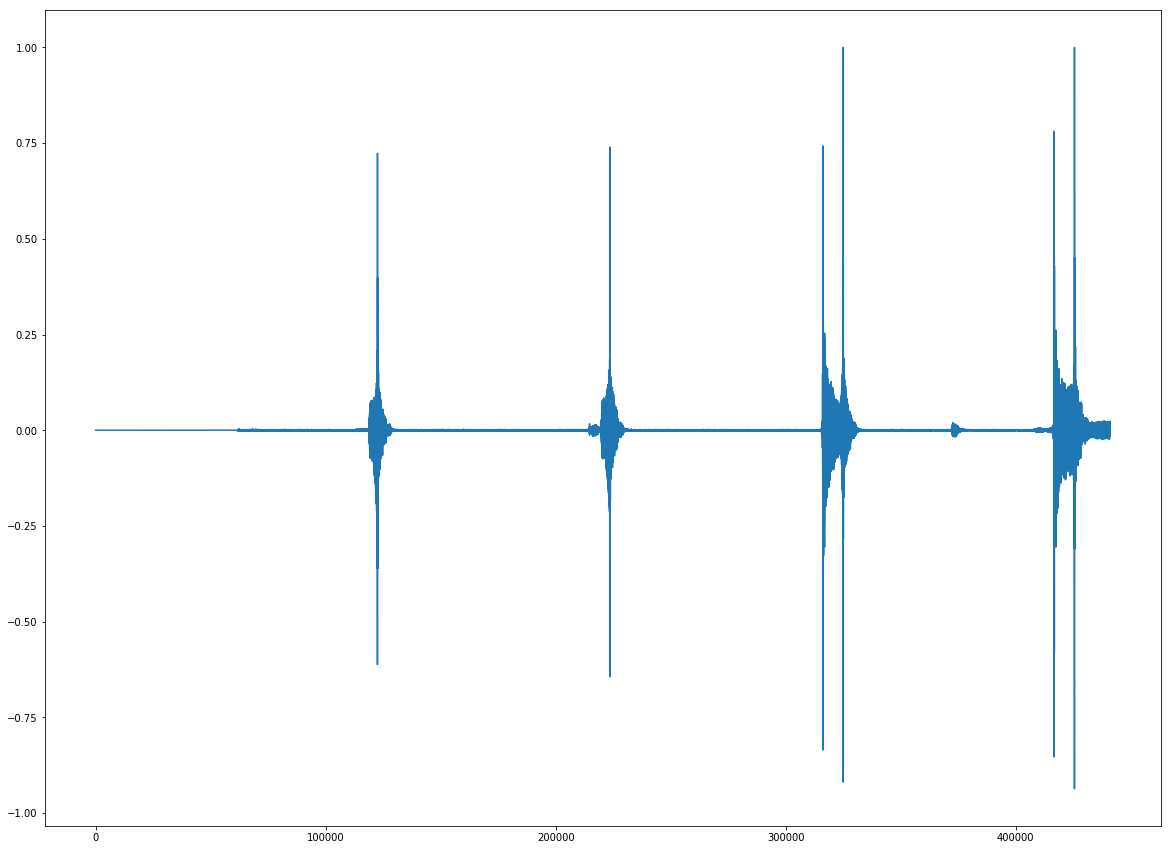

In [38]:

import sounddevice as sd
import numpy as np
import scipy.io.wavfile as wav

fs1=44100
duration = 10  # seconds
myrecording = sd.rec(duration * fs1, samplerate=fs1, channels=1,dtype='float64')
sd.wait()

plt.figure(figsize = (20,15))
plt.plot(myrecording)
plt.show()

write('myrecording.wav',fs1, myrecording)


In [51]:
myrecording = read('myrecording.wav')[1]
print(myrecording)
# myrecording = read('sonar.wav')[1][:,0]
# print(myrecording)

[  0.00000000e+00   0.00000000e+00  -3.05175781e-05 ...,   2.22167969e-02
   2.23083496e-02   2.22473145e-02]


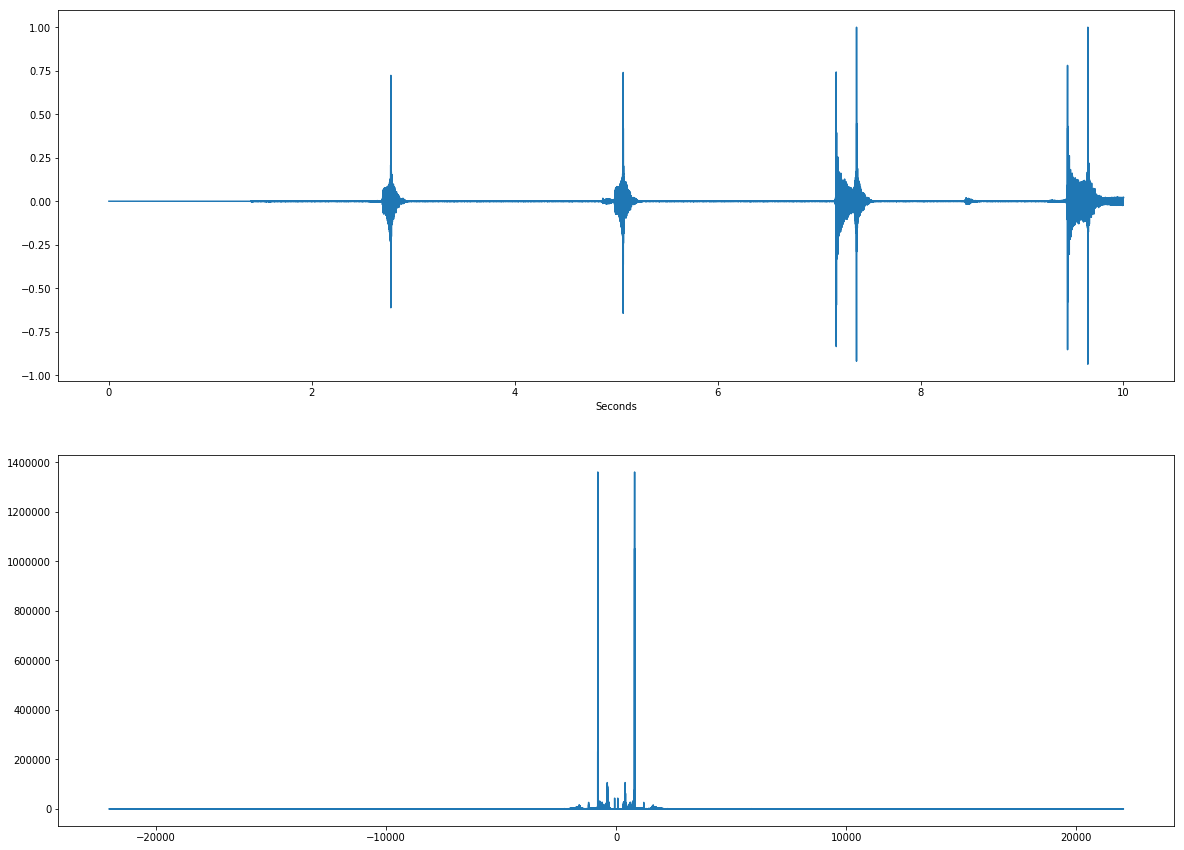

In [52]:
fs1=44100
time_vec = np.linspace(0,10,len(myrecording))

plt.figure(figsize = (20,15))
plt.subplot(211)

plt.plot(time_vec, myrecording)
plt.xlabel('Seconds')
spectrum = np.fft.fft(myrecording)
freq = np.fft.fftfreq(len(myrecording), 1/fs1)

plt.subplot(212)
plt.plot(freq, np.abs(spectrum)**2)
plt.show()


write('sonarny.wav',44100, myrecording)


In [67]:
x2 = np.convolve(x,myrecording)

In [68]:
z = x2

# Set N
N = 131072
# Overlap
step = int(N/2)
# Length of signal
length = len(x2)

# steps
n_steps = int(length/step)

# Using Hann window
tapering_window = signal.hann(N)

# Initialize matrix to contain N spectral components
# as a function of time (n_steps)
S = np.zeros([n_steps-1,N], dtype= np.float32)
# # Go through all time steps

for i in range(n_steps):
    
    zin = z[i*step:(i*step+N)]
    if len(zin) == N:
        # Filling up rows(time) with the signals magnitude over the window
        S[i,:] = np.abs(np.fft.fftshift(np.fft.fft(tapering_window*zin)))**2.0

In [69]:
# Making time vector from 0 to 10 with len(S) -> 762 points /long
tvec = np.linspace(0,10,len(S))

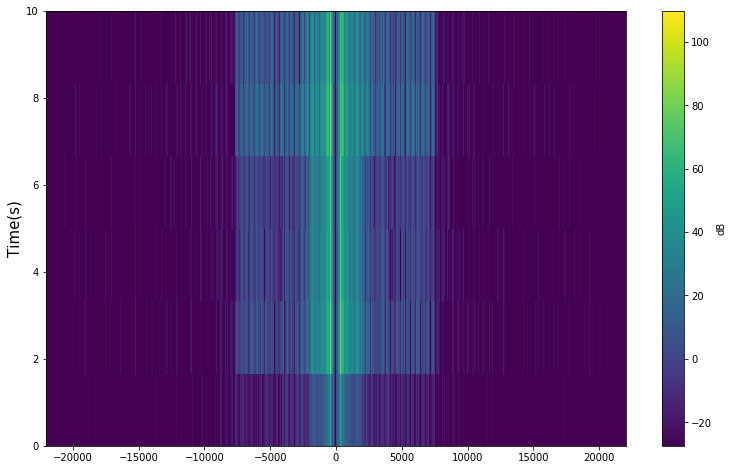

In [70]:
freq = np.fft.fftshift(np.fft.fftfreq(len(S[0]), 1/fs1))
#Db scale
dB = 10.0*np.log10(S)

plt.figure(figsize = ((13,8)))
# Use the median noise floor as the lowest color to make it easier to distinguish the differents signals
plt.pcolormesh(freq,tvec,dB,vmin = np.nanmedian(dB))
plt.ylabel('Time(s)',fontsize = '15')
zcol = plt.colorbar()
zcol.set_label('dB')
plt.savefig('spectrum.png')
# Uncomment this to show plots
plt.show()
plt.close()

In [41]:
x2 = np.convolve(x,myrecording)

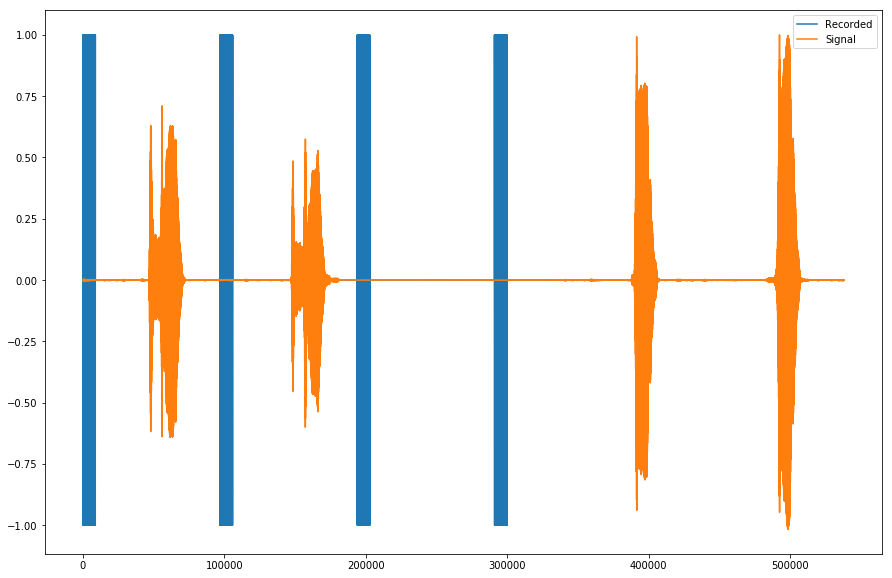

In [45]:
plt.figure(figsize = (15,10))

x1 = np.append(x,x)
x1 = np.append(x1,x)
x1 = np.append(x1,x)


x2 = x2/max(x2)
time_vec = np.linspace(0,10,len(x2))

x3 = np.fft.fftshift(x2)

plt.plot(x1, label = 'Recorded')
plt.plot(x3, label = 'Signal')
plt.legend()
plt.show()

In [1]:
corr = signal.correlate(x,myrecording, mode='full')[::-1]

plt.plot(corr)
plt.show()


NameError: name 'signal' is not defined

In [24]:
write('test.wav',fs1, corr)

In [ ]:
idx = np.where((freq < 1500) & (freq > -1500))[0]

plt.plot(freq[idx],abs(spectrum[idx])**2)
plt.show()

In [ ]:
idx = np.where((freq < 500) & (freq > -500))[0]

plt.plot(freq[idx],abs(spectrum[idx])**2)
plt.show()

In [ ]:
spectrum_low = np.fft.ifft(spectrum[idx])

plt.plot(np.real(spectrum_low))
plt.show()